In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import numpy as np


In [3]:
# Define paths
base_dir = "D:/AI Algorithm/Castor/"
train_dir = base_dir + "train/"
validate_dir = base_dir + "val/"
test_dir = base_dir + "test/"

# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
validate_data = validate_datagen.flow_from_directory(validate_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)


Found 2070 images belonging to 2 classes.
Found 594 images belonging to 2 classes.
Found 299 images belonging to 2 classes.


In [4]:
# Load pretrained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=validate_data
)


C:\Users\Anurag\cnn_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 347s 5s/step - accuracy: 0.7595 - loss: 0.4877 - val_accuracy: 0.9141 - val_loss: 0.2183
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 312s 5s/step - accuracy: 0.9075 - loss: 0.2268 - val_accuracy: 0.9327 - val_loss: 0.1609
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.9301 - loss: 0.1720 - val_accuracy: 0.9512 - val_loss: 0.1181
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.9535 - loss: 0.1354 - val_accuracy: 0.9613 - val_loss: 0.0954
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.9533 - loss: 0.1140 - val_accuracy: 0.9343 - val_loss: 0.1294
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 296s 5s/step - accuracy: 0.9646 - loss: 0.1019 - val_accuracy: 0.9562 - val_loss: 0.0893
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.9632 - loss: 0.0912 - val_accuracy: 0.9613 - val_loss: 0.0813
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - accuracy: 0.9650 - loss: 0.0841 - val_accuracy: 0.9747 - v

In [6]:
# Predict on test data
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()
y_true = test_data.classes

# Classification Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=1)
recall = recall_score(y_true, y_pred, zero_division=1)
f1 = f1_score(y_true, y_pred, zero_division=1)
try:
    auc = roc_auc_score(y_true, y_pred_probs.ravel())
except ValueError:
    auc = 0.0
conf_matrix = confusion_matrix(y_true, y_pred)

# Regression Metrics
mae = mean_absolute_error(y_true, y_pred_probs.ravel())
mse = mean_squared_error(y_true, y_pred_probs.ravel())
rmse = np.sqrt(mse)
explained_var = explained_variance_score(y_true, y_pred_probs.ravel())
r2 = r2_score(y_true, y_pred_probs.ravel())
mbd = np.mean(y_pred_probs.ravel() - y_true)

# Print metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}\n")

print("Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Explained Variance Score: {explained_var:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Bias Deviation (MBD): {mbd:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step
Classification Metrics:
Accuracy: 0.9498
Precision: 0.9950
Recall: 0.9349
F1-Score: 0.9640
AUC: 0.9977
Confusion Matrix:
[[ 83   1]
 [ 14 201]]

Regression Metrics:
Mean Absolute Error (MAE): 0.0619
Mean Squared Error (MSE): 0.0312
Root Mean Squared Error (RMSE): 0.1766
Explained Variance Score: 0.8549
R^2 Score: 0.8456
Mean Bias Deviation (MBD): -0.0432


In [7]:
# Save the model
model.save('vgg_net16.h5')
# Save the model in the recommended Keras format
model.save("vgg_net16.keras")  # Save in the .keras format
print("Model saved successfully!")

Model saved successfully!


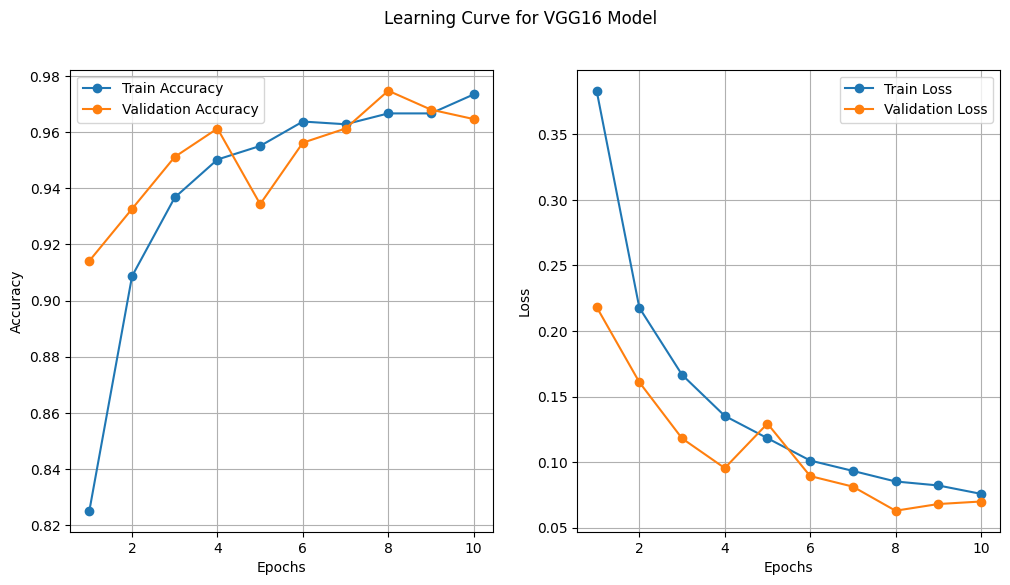

In [8]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy vs. epochs
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot loss vs. epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Set a common title
plt.suptitle('Learning Curve for VGG16 Model')
plt.show()

 9/65 ━━━━━━━━━━━━━━━━━━━━ 3:28 4s/step

C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step 
38/65 ━━━━━━━━━━━━━━━━━━━━ 1:38 4s/step

C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step 


C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step 
33/65 ━━━━━━━━━━━━━━━━━━━━ 1:56 4s/step

C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step 
 9/65 ━━━━━━━━━━━━━━━━━━━━ 3:20 4s/step

C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step 
13/65 ━━━━━━━━━━━━━━━━━━━━ 3:06 4s/step

C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step 
15/65 ━━━━━━━━━━━━━━━━━━━━ 3:05 4s/step

C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step 
26/65 ━━━━━━━━━━━━━━━━━━━━ 2:18 4s/step

C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step 
26/65 ━━━━━━━━━━━━━━━━━━━━ 2:18 4s/step

C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step 
20/65 ━━━━━━━━━━━━━━━━━━━━ 2:40 4s/step

C:\Users\Anurag\cnn_env\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\cnn_env\lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step 


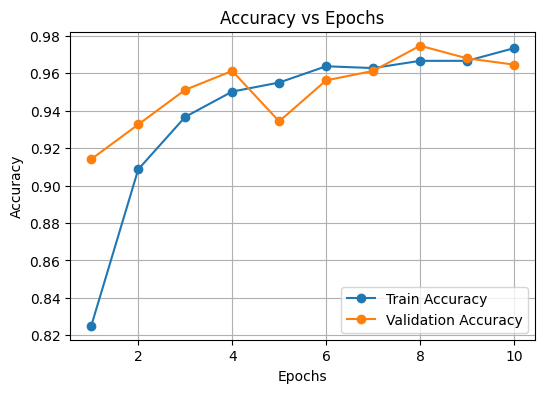

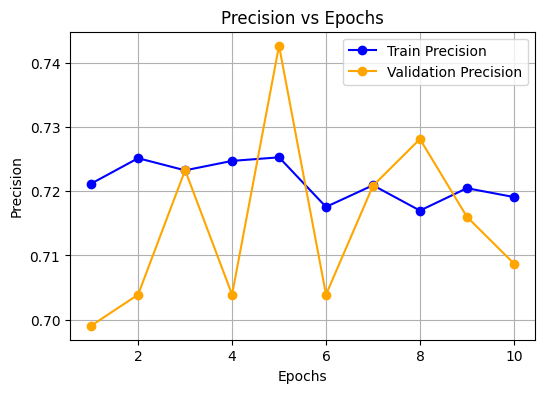

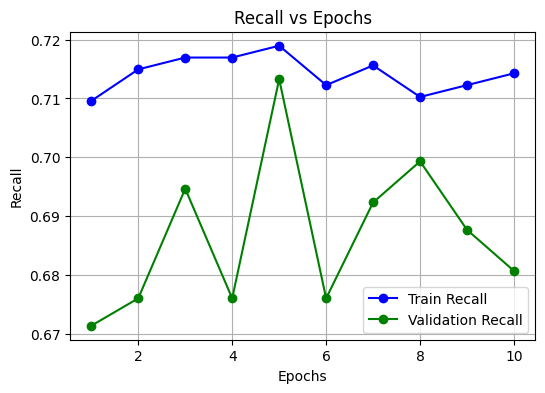

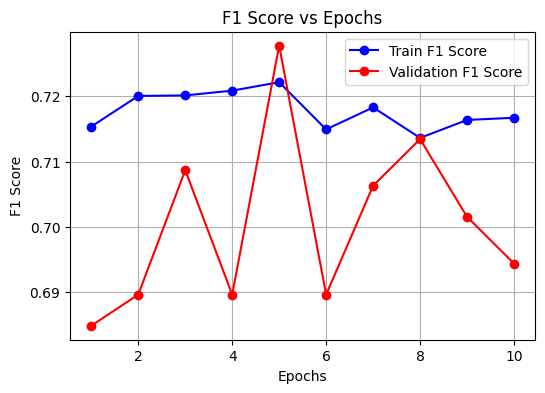


Tabular Data for Metrics per Epoch:

 Epoch  Train Accuracy  Validation Accuracy  Train Precision  Validation Precision  Train Recall  Validation Recall  Train F1 Score  Validation F1 Score
     1        0.825121             0.914141         0.721200              0.699029      0.709591           0.671329        0.715348             0.684899
     2        0.908696             0.932660         0.725170              0.703883      0.714956           0.675991        0.720027             0.689655
     3        0.936715             0.951178         0.723275              0.723301      0.716968           0.694639        0.720108             0.708680
     4        0.950242             0.961279         0.724746              0.703883      0.716968           0.675991        0.720836             0.689655
     5        0.955072             0.934343         0.725304              0.742718      0.718981           0.713287        0.722129             0.727705
     6        0.963768             0.956229 

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract accuracy from training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Lists to store metrics
train_precision_scores = []
train_recall_scores = []
train_f1_scores = []

val_precision_scores = []
val_recall_scores = []
val_f1_scores = []

# Compute Precision, Recall, and F1 Score for both training and validation after each epoch
for epoch in range(len(history.epoch)):
    # Training Data Predictions
    y_train_probs = model.predict(train_data)
    y_train_pred = (y_train_probs > 0.5).astype(int).ravel()
    y_train_true = train_data.classes

    train_precision_scores.append(precision_score(y_train_true, y_train_pred, zero_division=1))
    train_recall_scores.append(recall_score(y_train_true, y_train_pred, zero_division=1))
    train_f1_scores.append(f1_score(y_train_true, y_train_pred, zero_division=1))

    # Validation Data Predictions
    y_val_probs = model.predict(validate_data)
    y_val_pred = (y_val_probs > 0.5).astype(int).ravel()
    y_val_true = validate_data.classes

    val_precision_scores.append(precision_score(y_val_true, y_val_pred, zero_division=1))
    val_recall_scores.append(recall_score(y_val_true, y_val_pred, zero_division=1))
    val_f1_scores.append(f1_score(y_val_true, y_val_pred, zero_division=1))

epochs = range(1, len(train_acc) + 1)

# Plot Accuracy vs Epochs
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy vs Epochs')
plt.show()

# Plot Precision vs Epochs
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_precision_scores, label='Train Precision', marker='o', color='blue')
plt.plot(epochs, val_precision_scores, label='Validation Precision', marker='o', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.title('Precision vs Epochs')
plt.show()

# Plot Recall vs Epochs
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_recall_scores, label='Train Recall', marker='o', color='blue')
plt.plot(epochs, val_recall_scores, label='Validation Recall', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid()
plt.title('Recall vs Epochs')
plt.show()

# Plot F1 Score vs Epochs
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_f1_scores, label='Train F1 Score', marker='o', color='blue')
plt.plot(epochs, val_f1_scores, label='Validation F1 Score', marker='o', color='red')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.title('F1 Score vs Epochs')
plt.show()

# Create a DataFrame to store tabular results
data = {
    'Epoch': epochs,
    'Train Accuracy': train_acc,
    'Validation Accuracy': val_acc,
    'Train Precision': train_precision_scores,
    'Validation Precision': val_precision_scores,
    'Train Recall': train_recall_scores,
    'Validation Recall': val_recall_scores,
    'Train F1 Score': train_f1_scores,
    'Validation F1 Score': val_f1_scores
}

df = pd.DataFrame(data)
print("\nTabular Data for Metrics per Epoch:\n")
print(df.to_string(index=False))  # Print without row index

# Optionally, save this data to a CSV file
df.to_csv('metrics_per_epoch.csv', index=False)
